<a href="https://colab.research.google.com/github/kaihcodes/employment_bboomervsmill_in_python/blob/main/employmentdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('https://public.tableau.com/app/sample-data/EMSI_MillenialsvsBabyBoomers.xls', sheet_name='National, 2-digit')
df.head(50)
df.info() #46 records, no na in the table
df.sample(10,random_state=1)
df.sort_values(['Generation','Occupation'])
df.Occupation.value_counts()
df.Occupation.nunique() #equally split between baby b and millenial

#query data
df.head(20)
df.loc[(df['Generation']=='Baby Boomer') & (df['% Job Change'] < 0)]
df.loc[df['Job Change'] > 500000]
df.loc[df['Occupation'].str.contains('Food')]

#new column, add conditional
#try np.where, and define a function and add if statement
import numpy as np
df.head(20)
df1 = df.copy()
df1['Job Change Scale'] = np.where(df1['Job Change']>100000, 'Hi','Lo')
df1

def jobchange(row):
  if row['% Job Change'] > 0.2:
    return 'Very High'
  elif row['% Job Change'] <= 0.2 and row['% Job Change'] > 0:
    return 'High'
  else:
    return 'Low'

df1['Job Change Scale 2'] = df1.apply(jobchange, axis=1)
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First 2 of SOC          46 non-null     int64  
 1   SOC                     46 non-null     object 
 2   Occupation              46 non-null     object 
 3   Generation              46 non-null     object 
 4   2007 Jobs               46 non-null     int64  
 5   2013 Jobs               46 non-null     int64  
 6   Job Change              46 non-null     int64  
 7   % Job Change            46 non-null     float64
 8   2007 Share of All Jobs  46 non-null     float64
 9   2013 Share of All Jobs  46 non-null     float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ KB


,First 2 of SOC,SOC,Occupation,Generation,2007 Jobs,2013 Jobs,Job Change,% Job Change,2007 Share of All Jobs,2013 Share of All Jobs,Job Change Scale,Job Change Scale 2
0,11,11-0000,Management Occupations,Baby Boomer,1465399,1506812,41413,0.028261,0.1750,0.19,Lo,High
1,21,21-0000,Community and Social Service Occupations,Baby Boomer,419589,457468,37879,0.090276,0.1852,0.19,Lo,High
2,25,25-0000,"Education, Training, and Library Occupations",Baby Boomer,1666597,1697604,31007,0.018605,0.1940,0.19,Lo,High
3,17,17-0000,Architecture and Engineering Occupations,Baby Boomer,422861,462564,39703,0.093891,0.1593,0.18,Lo,High
4,19,19-0000,"Life, Physical, and Social Science Occupations",Baby Boomer,189040,214879,25839,0.136685,0.1633,0.18,Lo,High
5,23,23-0000,Legal Occupations,Baby Boomer,214033,222448,8415,0.039316,0.1643,0.18,Lo,High
6,13,13-0000,Business and Financial Operations Occupations,Baby Boomer,1099023,1225149,126126,0.114762,0.1543,0.17,Hi,High
7,29,29-0000,Healthcare Practitioners and Technical Occupat...,Baby Boomer,1161066,1413668,252602,0.217560,0.1549,0.17,Hi,Very High
8,33,33-0000,Protective Service Occupations,Baby Boomer,549128,564740,15612,0.028431,0.1639,0.17,Lo,High
9,43,43-0000,Office and Administrative Support Occupations,Baby Boomer,3591385,3937939,346554,0.096496,0.1497,0.17,Hi,High


mean                                                  \
                   2007 Jobs                    2013 Jobs                      
Job Change Scale 2      High      Low Very High      High      Low Very High   
Generation                                                                     
Baby Boomer           944057   853148    811758   1023861   827748    999252   
Millennial           1526872  2094815         0   1648490  1947703         0   

                         max                                                  
                   2007 Jobs                    2013 Jobs                     
Job Change Scale 2      High      Low Very High      High      Low Very High  
Generation                                                                    
Baby Boomer          3591385   853148   1161066   3937939   827748   1413668  
Millennial           4431037  6630203         0   4504482  6389681         0

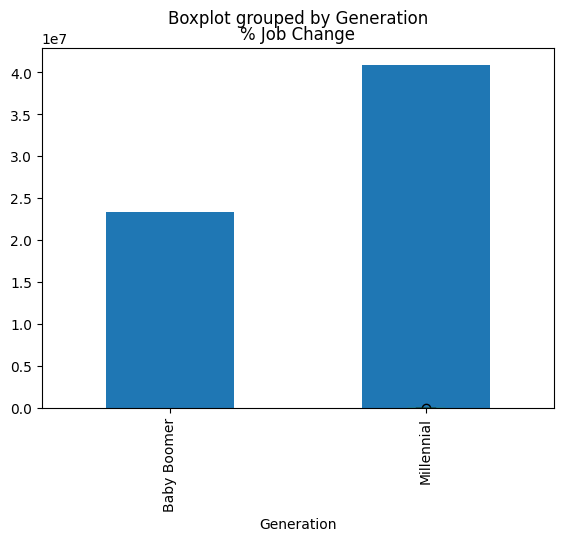

In [2]:
#use pandas built in visualization
df1.boxplot(column=['% Job Change'], by=['Generation'])
df1.groupby(['Generation'])['2013 Jobs'].sum().plot(kind='bar')

#use pivot table, groupby
df1.groupby('Generation')['2013 Jobs'].mean().astype(int)
df1.groupby('Generation')['2013 Jobs'].agg(['mean','max','min']).astype(int)
df1.groupby('Generation').agg({'2007 Jobs': 'max','2013 Jobs':'max','Job Change': 'mean','% Job Change': 'mean'})
df1.groupby(['Generation','Job Change Scale 2']).agg({'2007 Jobs':'max','2013 Jobs':'max'})

df1.pivot_table(values=['2007 Jobs','2013 Jobs'],index='Generation',columns='Job Change Scale 2',aggfunc=['mean','max']).fillna(0).astype(int)

In [8]:
#combine 1st tab and 2nd tab, 2 digit with 5 digit
df2 = pd.read_excel('https://public.tableau.com/app/sample-data/EMSI_MillenialsvsBabyBoomers.xls', sheet_name='National, 5-digit',nrows=1559)
df2.info()
df.info()

df2.drop(labels='Change in Share',axis=1,inplace=True) #drop the last column, doedsn't need it
df2.info()

#add 1 column in each table
df2c = df2.copy()
df1c = df.copy()
df2c['Type'] = 'Sector'
df1c['Type'] = 'Industry'

df2c.info() #somehow imported all empty rows around 65k, so added nrows in read excel to stop at 1559
df2c.tail(20)
df1c.head(20)

df3c = pd.concat([df1c,df2c])
df3c.info()

df3c.loc[df3c['First 2 of SOC'] == 11].head(50)
df3c.loc[df3c['First 2 of SOC'] == 11].pivot_table(values=['2013 Jobs'],index=['Type','Generation'],aggfunc=['mean','median','max','min']).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First 2 of SOC          1559 non-null   int64  
 1   SOC                     1559 non-null   object 
 2   Occupation              1559 non-null   object 
 3   Generation              1559 non-null   object 
 4   2007 Jobs               1559 non-null   int64  
 5   2013 Jobs               1559 non-null   int64  
 6   Job Change              1559 non-null   int64  
 7   % Job Change            1559 non-null   float64
 8   2007 Share of All Jobs  1559 non-null   float64
 9   2013 Share of All Jobs  1559 non-null   float64
 10  Change in Share         1559 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 134.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                  Non-Null

mean    median       max       min
                     2013 Jobs 2013 Jobs 2013 Jobs 2013 Jobs
Type     Generation                                         
Industry Baby Boomer   1506812   1506812   1506812   1506812
         Millennial    1461670   1461670   1461670   1461670
Sector   Baby Boomer     44317     27374    351645       907
         Millennial      42990     20572    377253       950